<a href="https://colab.research.google.com/github/Pballer/auto_trader/blob/colab/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow.keras as keras
import numpy as np
import seaborn as sns

# Intro Guide to RNN timeseries prediction

In [0]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [0]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

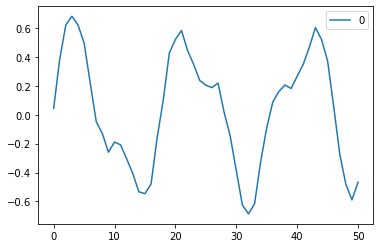

In [12]:
sns.lineplot(data=series[0]);

In [0]:
# [batch size, time steps, dimensionality], 
# where dimensionality is 1 for univariate time series and more for multivariate time series.
X_train.shape

(7000, 50, 1)

### Naive approach: T-1 prediciton

In [0]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.021341251

### Naive approach: Linear Model

In [0]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

In [0]:
model.compile(optimizer='adam', loss='mse')

In [0]:
history = model.fit(X_train, y_train, epochs=20)

Train on 7000 samples
Epoch 1/20
7000/7000 [==============================] - 1s 204us/sample - loss: 0.1815
Epoch 2/20
7000/7000 [==============================] - 1s 72us/sample - loss: 0.0349
Epoch 3/20
7000/7000 [==============================] - 1s 74us/sample - loss: 0.0125
Epoch 4/20
7000/7000 [==============================] - 1s 74us/sample - loss: 0.0077
Epoch 5/20
7000/7000 [==============================] - 1s 73us/sample - loss: 0.00650s - loss: 0
Epoch 6/20
7000/7000 [==============================] - 1s 75us/sample - loss: 0.0059
Epoch 7/20
7000/7000 [==============================] - 1s 74us/sample - loss: 0.0056
Epoch 8/20
7000/7000 [==============================] - 1s 75us/sample - loss: 0.0052
Epoch 9/20
7000/7000 [==============================] - 1s 93us/sample - loss: 0.0049
Epoch 10/20
7000/7000 [==============================] - 1s 87us/sample - loss: 0.0047
Epoch 11/20
7000/7000 [==============================] - 1s 74us/sample - loss: 0.0045
Epoch 12/20
7000/

In [0]:
score = model.evaluate(X_test, y_test)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
score

0.003516263984143734

### Simple RNN

In [0]:
keras.backend.clear_session()
rnn_model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

In [0]:
rnn_model.compile(optimizer='adam', loss='mse')

In [0]:
history = rnn_model.fit(X_train, y_train, epochs=20)

Train on 7000 samples
Epoch 1/20
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.0687
Epoch 2/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0479
Epoch 3/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0324
Epoch 4/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0217
Epoch 5/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0157
Epoch 6/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0131
Epoch 7/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0123
Epoch 8/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0120
Epoch 9/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0119
Epoch 10/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0118
Epoch 11/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0116
Epoch 12/20
7000/7000 [=============

In [0]:
score = rnn_model.evaluate(X_test, y_test)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

#### Better than naive T-1, but still worse than linear model

In [0]:
score

0.010483284590765835

### Multiple RNN Layers

In [0]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

In [0]:
model.compile(optimizer='adam', loss='mse')

In [15]:
history = model.fit(X_train, y_train, epochs=20)

Train on 7000 samples
Epoch 1/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0370
Epoch 2/20
7000/7000 [==============================] - 7s 973us/sample - loss: 0.0060
Epoch 3/20
7000/7000 [==============================] - 7s 945us/sample - loss: 0.0050
Epoch 4/20
7000/7000 [==============================] - 7s 938us/sample - loss: 0.0043
Epoch 5/20
7000/7000 [==============================] - 7s 937us/sample - loss: 0.0040
Epoch 6/20
7000/7000 [==============================] - 7s 982us/sample - loss: 0.0037
Epoch 7/20
7000/7000 [==============================] - 7s 970us/sample - loss: 0.0036
Epoch 8/20
7000/7000 [==============================] - 7s 958us/sample - loss: 0.0037
Epoch 9/20
7000/7000 [==============================] - 6s 904us/sample - loss: 0.0035
Epoch 10/20
7000/7000 [==============================] - 7s 965us/sample - loss: 0.0036
Epoch 11/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0033
Epoch 12/20
7000/7000 

In [16]:
score = model.evaluate(X_test, y_test)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [17]:
score

0.003019924949388951

In [0]:
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

In [23]:
np.mean(keras.losses.mean_squared_error(Y_new, Y_pred))

0.032001544